##Identify the Sentiments
Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. Brands can use this data to measure the success of their products in an objective manner. In this challenge, you are provided with tweet data to predict sentiment on electronic products of netizens.

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import pickle
%matplotlib inline
import subprocess

In [ ]:
!pip install bert-serving-client
!pip install -U bert-serving-server[http]

     |████████████████████████████████| 71kB 3.9MB/s 
     |████████████████████████████████| 358kB 16.6MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=4b8630e5336ca5cf15da4cd6d1cd293b8bca68cb501eaf75d2bd53825b75ffa2
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
  Created wheel for flask-compress: filename=Flask_Compress-1.7.0-cp36-none-any.whl size=6833 sha256=8679c8cd7eca065101b502ae99d7b060639564f284d5399fc0cb0a2d3108cafe
  Stored in directory: /root/.cache/pip/wheels/1d/b7/18/2b88ed33c5ef53868d1bfb0d3f2f351ae0143414734415bd06
Successfully built GPUtil flask-compress


In [ ]:
# Download and unzip the pre-trained model
!wget http://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
!unzip uncased_L-12_H-768_A-12.zip

--2020-10-26 20:40:02--  http://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 407727028 (389M) [application/zip]
Saving to: ‘uncased_L-12_H-768_A-12.zip’

uncased_L-12_H-768_ 100%[===================>] 388.84M   120MB/s    in 3.2s    

2020-10-26 20:40:06 (120 MB/s) - ‘uncased_L-12_H-768_A-12.zip’ saved [407727028/407727028]

Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


In [ ]:
!pwd 
!ls

/content
sample_data  uncased_L-12_H-768_A-12  uncased_L-12_H-768_A-12.zip


In [ ]:
# Start the BERT server
bert_command='bert-serving-start -model_dir /content/uncased_L-12_H-768_A-12'
process=subprocess.Popen(bert_command.split(),stdout=subprocess.PIPE)

In [ ]:
!nohup bert-serving-start -model_dir=./uncased_L-12_H-768_A-12 > out.file 2>&1 &

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [ ]:
from bert_serving.client import BertClient
bc = BertClient()

In [ ]:
# Load the training dataset
df = pd.read_csv('./train.csv')
print(df.head())

   id  label                                              tweet
0   1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1   2      0  Finally a transparant silicon case ^^ Thanks t...
2   3      0  We love this! Would you go? #talk #makememorie...
3   4      0  I'm wired I know I'm George I was made that wa...
4   5      1  What amazing service! Apple won't even talk to...


In [ ]:
# Create a list of punctuation marks
#Ref google
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√']

In [ ]:
# Code to replace punctuations with whitespaces
def clean_text(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, ' ')
    return x


In [ ]:
df.tweet=df.tweet.apply(lambda x:clean_text(x))

In [ ]:
df.tweet=df.tweet.apply(lambda x:re.sub(r'http\S+','',x))

In [ ]:
df.tweet=df.tweet.apply(lambda x:re.sub(r'@[\w]*','',x))

In [ ]:
df.tweet=df.tweet.apply(lambda x:x.lower())

In [ ]:
df.tweet=df.tweet.apply(lambda x:' '.join(x.split()))

In [ ]:
df.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test goo gl h1mfqv andro...
1,2,0,finally a transparant silicon case thanks to m...
2,3,0,we love this would you go talk makememories un...
3,4,0,i m wired i know i m george i was made that wa...
4,5,1,what amazing service apple won t even talk to ...


In [ ]:
# Compute embeddings for training tweets using Bert Client encode function
# The model returns 768-dimensional embeddings
tweets=df.tweet
tweet_list=[word for word in tweets]
embeddings=bc.encode(tweet_list)

/usr/local/lib/python3.6/dist-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=25" set on the server, as consequence you may get less-accurate or truncated embeddings.
here is what you can do:
- disable the length-check by create a new "BertClient(check_length=False)" when you do not want to display this warning
- or, start a new server with a larger "max_seq_len"
  '- or, start a new server with a larger "max_seq_len"' % self.length_limit)


In [ ]:
print(embeddings.shape)

(7920, 768)


In [ ]:
# save bert_train_new for reuse as it would take a really long time for conversion
pickle_out=open('bert_train.pickle','wb')
pickle.dump(embeddings,pickle_out)
pickle_out.close()

In [ ]:
#loading test dataset
df1=pd.read_csv('test.csv')
df1.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [ ]:
df1.tweet=df1.tweet.apply(lambda x:clean_text(x))
df1.tweet=df1.tweet.apply(lambda x:re.sub(r'http\S+','',x))
df1.tweet=df1.tweet.apply(lambda x:re.sub(r'@[\w]*','',x))
df1.tweet=df1.tweet.apply(lambda x:x.lower())
df1.tweet=df1.tweet.apply(lambda x:' '.join(x.split()))

In [ ]:
# Compute embeddings for training tweets using Bert Client encode function
# The model returns 768-dimensional embeddings
test_tweets=df1.tweet
test_tweet_list=[word for word in test_tweets]
test_embeddings=bc.encode(test_tweet_list)

In [ ]:
print(test_embeddings.shape)

(1953, 768)


In [ ]:
# save bert_train_new for reuse as it would take a really long time for conversion
pickle_out1=open('bert_test.pickle','wb')
pickle.dump(test_embeddings,pickle_out1)
pickle_out1.close()

##Spacy Word2Vec


In [ ]:
pd.set_option('display.max_colwidth',100)

In [ ]:
!python -m spacy download en_vectors_web_lg


     |████████████████████████████████| 661.8MB 1.1MB/s 
  Created wheel for en-vectors-web-lg: filename=en_vectors_web_lg-2.1.0-cp36-none-any.whl size=663461749 sha256=c20f1de62ff791030b4a8e786320f863cb00ba9b178fbda72d1fdea6b197fbf6
  Stored in directory: /tmp/pip-ephem-wheel-cache-c0k7l_x1/wheels/ce/3e/83/59647d0b4584003cce18fb68ecda2866e7c7b2722c3ecaddaf
Successfully built en-vectors-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_vectors_web_lg')


In [ ]:
!python -m spacy download en_vectors_web_lg


✔ Download and installation successful
You can now load the model via spacy.load('en_vectors_web_lg')


In [ ]:
import spacy
# Load the largest english language vector collection from Spacy
nlp = spacy.load('en_vectors_web_lg')

In [ ]:
df['label'].value_counts(normalize = True)

0    0.744192
1    0.255808
Name: label, dtype: float64

In [ ]:
# Function to lemmatize the tokens to their basic forms to normalize the tweet text
# and focus on key words for the classification tasks

def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output


In [ ]:
%%time
df.tweet=lemmatization(df.tweet)

df.tweet=df.tweet.str.replace('-PRON-','')

CPU times: user 1.35 s, sys: 4.36 ms, total: 1.35 s
Wall time: 1.36 s


In [ ]:
%%time
df1.tweet=lemmatization(df1.tweet)
df1.tweet=df1.tweet.str.replace('-PRON-','')

CPU times: user 318 ms, sys: 84 µs, total: 318 ms
Wall time: 318 ms


In [ ]:
nlp('having').vector

array([ 1.1235e-01,  2.1697e-01, -2.1090e-01,  1.6637e-01,  9.6581e-02,
       -3.5390e-02,  3.2933e-01, -2.7312e-01, -1.5304e-02,  2.6093e+00,
        1.3405e-01,  3.7844e-04,  5.4900e-02, -2.5173e-01, -3.5485e-01,
       -3.7260e-01, -1.7240e-03,  1.1956e+00, -4.1293e-01,  3.5877e-01,
        5.1265e-03, -2.9626e-01, -2.4748e-01,  1.6286e-01,  7.5768e-02,
        1.3535e-02, -7.9647e-02, -4.9073e-01, -1.0783e-01, -6.3812e-02,
       -1.3171e-01,  1.8626e-01,  2.4554e-01,  2.5685e-01,  3.0148e-01,
       -4.8167e-01,  4.0285e-01, -4.7838e-02, -8.0964e-02, -5.6645e-01,
        2.1666e-01,  1.1220e-01,  1.5485e-02,  3.1444e-01, -4.7426e-01,
        3.0210e-01, -3.6470e-01, -3.4347e-01,  9.9283e-02, -8.5861e-02,
       -8.2277e-02, -2.5866e-02, -4.7161e-02, -2.1301e-01,  2.6880e-01,
        1.8113e-01, -2.0620e-01, -2.4319e-02, -1.5963e-01,  8.6472e-02,
        1.8116e-01,  1.2205e-01, -4.6879e-01,  2.7622e-01,  3.7899e-02,
        4.4370e-03,  2.6413e-01,  2.2721e-01, -1.7805e-02,  2.75

In [ ]:
# Convert cleaned tweets into Spacy word vectors
# The model returns 300-dimensional embeddings

tweets=df.tweet
tweet_list=[nlp(word).vector for word in tweets]
X_tr=np.array(tweet_list)

In [ ]:
test_tweets = df1.tweet
test_word_vec = [nlp(word).vector for word in test_tweets]
X_te = np.array(test_word_vec)

In [ ]:
print(X_tr.shape, X_te.shape)

(7920, 300) (1953, 300)


In [ ]:
# Save Spacy_train_new
pickle_out = open("Spacy_train.pickle","wb")
pickle.dump(X_tr, pickle_out)
pickle_out.close()

# Save Spacy_test_new
pickle_out = open("Spacy_test.pickle","wb")
pickle.dump(X_te, pickle_out)
pickle_out.close()

In [ ]:
# Additional 'Optional' step for text normalization
# Import spaCy's language model
nlp1 = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!pip install tensorflow-hub

In [ ]:
!pip install tensorflow_gpu==1.5.0

     |████████████████████████████████| 201.9MB 85kB/s 
     |████████████████████████████████| 3.0MB 50.0MB/s 
  Found existing installation: tensorflow-gpu 1.2.0
    Uninstalling tensorflow-gpu-1.2.0:
      Successfully uninstalled tensorflow-gpu-1.2.0


In [ ]:
import tensorflow_hub as hub


In [ ]:
import tensorflow as tf

elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
def elmo_convert(x):
  embeddings=elmo(x.tolist(),signature='default',as_dict=True)['elmo']
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

In [ ]:
# Creating batches of 100 tweets to feed into elmo model at a time as it consumes high computation power and memory 
list_train = [df[i:i+100] for i in range(0,df.shape[0],100)]
list_test = [df1[i:i+100] for i in range(0,df1.shape[0],100)]

In [ ]:
# Extract ELMo embeddings
elmo_train=[elmo_convert(x['tweet']) for x in list_train]
elmo_test=[elmo_convert(x['tweet']) for x in list_test]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
# Concatenating converted batches into single array of train and test dataset embeddings
elmo_train_new=np.concatenate(elmo_train,axis=0)
elmo_test_new=np.concatenate(elmo_test,axis=0)

In [ ]:
# save elmo_train
pickle_out = open("elmo_train.pickle","wb")
pickle.dump(elmo_train_new, pickle_out)
pickle_out.close()

# save elmo_test
pickle_out = open("elmo_test.pickle","wb")
pickle.dump(elmo_test_new, pickle_out)
pickle_out.close()

In [ ]:
df_train=pd.read_csv('train.csv')

In [ ]:
#adding tweet length
df_train['tweet_len_total']=df_train.tweet.str.len()

In [ ]:
df_train.head()

,id,label,tweet,tweet_len_total
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,128
1,2,0,Finally a transparant silicon case ^^ Thanks t...,131
2,3,0,We love this! Would you go? #talk #makememorie...,123
3,4,0,I'm wired I know I'm George I was made that wa...,112
4,5,1,What amazing service! Apple won't even talk to...,124


In [ ]:
#punctuation length as  a feature
# Function to calculate the total length of punctuation marks in a tweet
def puncts_len(x):
    punct_list = []
    x = str(x)
    for punct in puncts:
        for char in x:
            if punct==char:
                punct_list.append(punct)
    return len(punct_list)

In [ ]:
df_train['punc_len']=df_train.tweet.apply(lambda x:puncts_len(x))

In [ ]:
df_train.head()

,id,label,tweet,tweet_len_total,punc_len
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,128,16
1,2,0,Finally a transparant silicon case ^^ Thanks t...,131,17
2,3,0,We love this! Would you go? #talk #makememorie...,123,18
3,4,0,I'm wired I know I'm George I was made that wa...,112,17
4,5,1,What amazing service! Apple won't even talk to...,124,5


In [ ]:
df_train.punc_len.describe()

count    7920.000000
mean       13.956692
std         8.406173
min         0.000000
25%         7.000000
50%        15.000000
75%        18.000000
max        59.000000
Name: punc_len, dtype: float64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               7920 non-null   int64 
 1   label            7920 non-null   int64 
 2   tweet            7920 non-null   object
 3   tweet_len_total  7920 non-null   int64 
 4   punc_len         7920 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 309.5+ KB


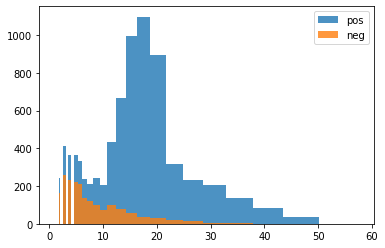

In [ ]:
bins=1.15**(np.arange(0,30))
plt.hist(df_train.punc_len,bins=bins,alpha=0.8)
plt.hist(df_train[df_train.label==1]['punc_len'],bins=bins,alpha=0.8)
plt.legend(('pos','neg'))
plt.show()

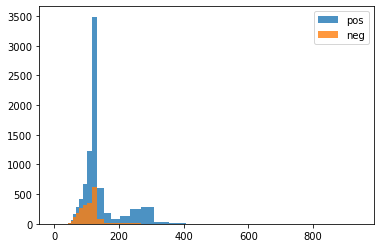

In [ ]:
bins = 1.15**(np.arange(0,50))
plt.hist(df_train['tweet_len_total'],bins=bins,alpha=0.8)
plt.hist(df_train[df_train['label']==1]['tweet_len_total'],bins=bins,alpha=0.8)
plt.legend(('pos','neg'))
plt.show()


In [ ]:
df_train.to_csv('more_features_train.csv')

In [ ]:
# Similarly for test dataset loading new dataframe
df_test= pd.read_csv('test.csv')


In [ ]:
#adding tweet length
df_test['tweet_len_total']=df_test.tweet.str.len()

In [ ]:
df_test['punc_len']=df_test.tweet.apply(lambda x:puncts_len(x))

In [ ]:
df_test.to_csv('more_features_test.csv')

In [ ]:
# Load Spacy_train Vectors
pickle_in = open("Spacy_train.pickle","rb")
spacy_train = pickle.load(pickle_in)
# Load Spacy_test Vectors
pickle_in = open("Spacy_test.pickle","rb")
spacy_test = pickle.load(pickle_in)


In [ ]:
# Load BERT_train Vectors
pickle_in = open("bert_train.pickle","rb")
bert_train = pickle.load(pickle_in)

# Load BERT_test Vectors
pickle_in = open("bert_test.pickle","rb")
bert_test = pickle.load(pickle_in)

In [ ]:
# Load ELMo_train Vectors
pickle_in = open("elmo_train.pickle","rb")
elmo_train = pickle.load(pickle_in)

# Load ELMo_test Vectors
pickle_in = open("elmo_test.pickle","rb")
elmo_test = pickle.load(pickle_in)


In [ ]:
# Create Spacy + BERT Vectors
sb_train=np.hstack((spacy_train,bert_train))

In [ ]:
sb_test=np.hstack((spacy_test,bert_test))

In [ ]:
# save spacy_bert_train
pickle_out = open("Spacy_bert_train.pickle","wb")
pickle.dump(sb_train, pickle_out)
pickle_out.close()
# save Spacy_bert_test
pickle_out = open("Spacy_bert_test.pickle","wb")
pickle.dump(sb_test, pickle_out)
pickle_out.close()


In [ ]:
# Create BERT + ELMo Vectors
bert_elmo_train = np.hstack((bert_train, elmo_train))
bert_elmo_test = np.hstack((bert_test, elmo_test))

print(bert_elmo_train.shape, bert_elmo_test.shape)

# save bert_elmo_train
pickle_out = open("bert_elmo_train.pickle","wb")
pickle.dump(bert_elmo_train, pickle_out)
pickle_out.close()

# save bert_elmo_test
pickle_out = open("bert_elmo_test.pickle","wb")
pickle.dump(bert_elmo_test, pickle_out)
pickle_out.close()


(7920, 1792) (1953, 1792)


In [ ]:
# Create Spacy + ELMo Vectors
spacy_elmo_train = np.hstack((spacy_train, elmo_train))
spacy_elmo_test = np.hstack((spacy_test, elmo_test))

print(spacy_elmo_train.shape, spacy_elmo_test.shape)

# save Spacy_elmo_train
pickle_out = open("Spacy_elmo_train.pickle","wb")
pickle.dump(spacy_elmo_train, pickle_out)
pickle_out.close()

# save Spacy_elmo_test
pickle_out = open("Spacy_elmo_test.pickle","wb")
pickle.dump(spacy_elmo_test, pickle_out)
pickle_out.close()

(7920, 1324) (1953, 1324)


In [ ]:

# Create Spacy + BERT + ELMo Vectors
spacy_bert_elmo_train = np.hstack((spacy_train, bert_train, elmo_train))
spacy_bert_elmo_test = np.hstack((spacy_test, bert_test, elmo_test))

print(spacy_bert_elmo_train.shape, spacy_bert_elmo_test.shape)

# save Spacy_bert_elmo_train
pickle_out = open("Spacy_bert_elmo_train.pickle","wb")
pickle.dump(spacy_bert_elmo_train, pickle_out)
pickle_out.close()

# save Spacy_bert_elmo_test
pickle_out = open("Spacy_bert_elmo_test.pickle","wb")
pickle.dump(spacy_bert_elmo_test, pickle_out)
pickle_out.close()

(7920, 2092) (1953, 2092)


In [ ]:
# Load any variation of word embeddings from Spacy, BERT and ELMo and assign it to X variable
pickle_in = open("Spacy_bert_elmo_train.pickle","rb") 

In [ ]:
X=pickle.load(pickle_in)

In [ ]:
X.shape

(7920, 2092)

In [ ]:
# Load the training dataset into a dataframe
df = pd.read_csv('more_features_train.csv')
print(df.head())

   Unnamed: 0  id  ...  tweet_len_total punc_len
0           0   1  ...              128       16
1           1   2  ...              131       17
2           2   3  ...              123       18
3           3   4  ...              112       17
4           4   5  ...              124        5

[5 rows x 6 columns]


In [ ]:
df.label.value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [ ]:
y=df.label

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(-1,1))

In [ ]:
tweet_len=mms.fit_transform(np.array(df.tweet_len_total).reshape(-1,1))

In [ ]:
punc_len=mms.fit_transform(np.array(df.punc_len).reshape(-1,1))

In [ ]:
final_X=np.hstack((X,tweet_len,punc_len))

In [ ]:
print(final_X.shape)

(7920, 2094)


In [ ]:
# Split the training dataset into train and test subsets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.1, random_state=95)


In [ ]:
#we can apply any classification model
from sklearn import svm 
svc=svm.LinearSVC()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
text_clf=Pipeline([('clf',svc)])

In [ ]:
text_clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
# Make predictions
predictions = text_clf.predict(X_test)
print(predictions)


[0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(y_test,predictions)

array([[545,  38],
       [ 61, 148]])

In [ ]:
metrics.classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.90      0.93      0.92       583\n           1       0.80      0.71      0.75       209\n\n    accuracy                           0.88       792\n   macro avg       0.85      0.82      0.83       792\nweighted avg       0.87      0.88      0.87       792\n'

In [ ]:
metrics.accuracy_score(y_test,predictions)

0.875

In [ ]:
# Loading test dataset
df1 = pd.read_csv('more_features_test.csv')
print(df1.head())


   Unnamed: 0    id  ... tweet_len_total  punc_len
0           0  7921  ...              77         6
1           1  7922  ...             115        13
2           2  7923  ...             104         9
3           3  7924  ...             129         4
4           4  7925  ...              70         6

[5 rows x 5 columns]


In [ ]:
# Dropping tweet column as it is no longer required for final submission leaving only the id column for identification
df1 = df1.drop(['tweet'],axis=1)
print(df1.head())

   Unnamed: 0    id  tweet_len_total  punc_len
0           0  7921               77         6
1           1  7922              115        13
2           2  7923              104         9
3           3  7924              129         4
4           4  7925               70         6


In [ ]:
# Loading corresponding test tweets embeddings as loaded for the training dataset
pickle_in = open("Spacy_bert_elmo_test.pickle","rb")
test_X = pickle.load(pickle_in)
print(test_X.shape)

(1953, 2092)


In [ ]:
# Preparing test dataset for predictions by adding text features to the tweet embeddings data as it was done for training dataset 
tweet_len_arr_test = np.array(df1['tweet_len_total'])
tweet_punct_arr_test = np.array(df1['punc_len'])
print(tweet_len_arr_test.shape, tweet_punct_arr_test.shape)

tweet_len_norm_test = mms.fit_transform(tweet_len_arr_test.reshape(-1, 1))
tweet_punct_norm_test = mms.fit_transform(tweet_punct_arr_test.reshape(-1, 1))
print(tweet_len_norm_test.shape, tweet_punct_norm_test.shape)

test_X = np.hstack((test_X, tweet_len_norm_test, tweet_punct_norm_test))
print(test_X.shape)

(1953,) (1953,)
(1953, 1) (1953, 1)
(1953, 2094)


In [ ]:
# Making predictions using trained model for the test dataset for final submission 
test_predictions = text_clf.predict(test_X)
print(test_predictions)

[1 1 0 ... 0 1 0]


In [ ]:
df1.columns

Index(['Unnamed: 0', 'id', 'tweet_len_total', 'punc_len', 'label'], dtype='object')

In [ ]:

# Adding predicted labels to the test dataframe
df1['label'] = test_predictions
df1.drop(['Unnamed: 0','tweet_len_total', 'punc_len'],axis=1,inplace=True)
print(df1.head())

     id  label
0  7921      1
1  7922      1
2  7923      0
3  7924      1
4  7925      1


In [ ]:
# Saving the final predicted submission file to csv
df1.to_csv('ALL_SVM.csv', index=False)